Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
cancer_data = sklearn.datasets.load_breast_cancer()

In [3]:
cancer_df = pd.DataFrame(data = cancer_data.data, columns = cancer_data.feature_names)
cancer_df['label'] = cancer_data.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer_df.shape

(569, 31)

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [8]:
cancer_df.label.value_counts()

1    357
0    212
Name: label, dtype: int64

In [9]:
cancer_df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [10]:
X = cancer_df.drop(columns = 'label', axis = 1)
y = cancer_df.label

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

Standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Building the Neural Network

Importing the required libraries

In [14]:
# Importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [15]:
# setting up the layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),   # Flatten - used to convert 30 features matrix into a single d arrays
    keras.layers.Dense(20, activation = 'relu'), #relu - rectified linear units
    keras.layers.Dense(2, activation = 'sigmoid') # no of neurons = no of classes
])

In [16]:
# compiling the neural network
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# sparse_categorical_crossentropy in the case of label encoding
# categorical_crossentropy in the case of one hot encoding

In [17]:
# training the neural network
history = model.fit(X_train_std, y_train, validation_split = 0.1, epochs = 10)
# epochs - no of times the model has to go through the data

Epoch 1/10
13/13 [==============================] - 1s 14ms/step - loss: 0.5979 - accuracy: 0.6822 - val_loss: 0.4655 - val_accuracy: 0.8043
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3892 - accuracy: 0.8606 - val_loss: 0.3038 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2806 - accuracy: 0.9267 - val_loss: 0.2256 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.9389 - val_loss: 0.1851 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.9462 - val_loss: 0.1609 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9560 - val_loss: 0.1440 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1516 - accuracy: 0.9609 - val_loss: 0.1317 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

In [18]:
# Visualising the accuracy and loss

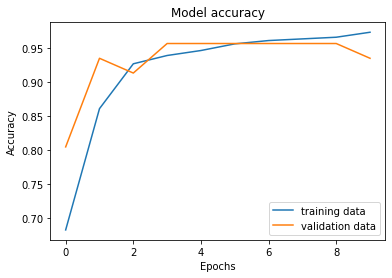

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['training data','validation data'], loc = 'lower right')

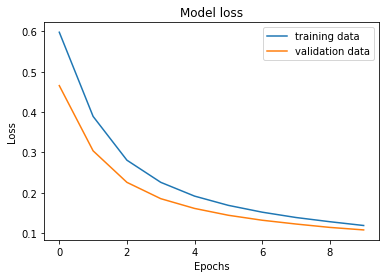

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['training data','validation data'], loc = 'upper right')

Accuracy of model on test data

In [21]:
loss, accuracy = model.evaluate(X_test_std, y_test)
accuracy

4/4 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9561


0.9561403393745422

In [22]:
X_test_std.shape, X_test_std[0]

((114, 30),
 array([-0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457 ,
        -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,
         0.53209124,  2.62763999,  0.62351167,  0.11405261,  1.01246781,
         0.41126289,  0.63848593,  2.88971815, -0.41675911,  0.74270853,
        -0.32983699, -1.67435595, -0.36854552, -0.38767294,  0.32655007,
        -0.74858917, -0.54689089, -0.18278004, -1.23064515, -0.6268286 ]))

In [23]:
test_pred = model.predict(X_test_std)
test_pred.shape

4/4 [==============================] - 0s 2ms/step


(114, 2)

In [24]:
test_pred

array([[4.54904944e-01, 4.74576682e-01],
       [4.11728501e-01, 4.17315871e-01],
       [4.99176001e-03, 8.03388238e-01],
       [9.82667148e-01, 2.22452858e-04],
       [2.55733401e-01, 3.57849270e-01],
       [9.74864006e-01, 1.46330008e-02],
       [1.24404155e-01, 6.20668411e-01],
       [1.57109126e-02, 6.67336404e-01],
       [6.36471733e-02, 5.46173394e-01],
       [5.28244562e-02, 5.81276834e-01],
       [3.71683478e-01, 5.64634621e-01],
       [4.34836224e-02, 7.56122231e-01],
       [1.36955395e-01, 4.99706835e-01],
       [1.98959947e-01, 5.26986599e-01],
       [1.54349329e-02, 6.58348978e-01],
       [9.51884866e-01, 1.33756623e-01],
       [1.24570839e-02, 7.61043847e-01],
       [6.94919601e-02, 6.63887382e-01],
       [1.27348676e-01, 6.71435058e-01],
       [7.84081280e-01, 8.26608110e-03],
       [3.59248996e-01, 6.27572298e-01],
       [2.18128562e-02, 7.82934248e-01],
       [5.75096197e-02, 6.79533124e-01],
       [1.21870646e-02, 6.79878592e-01],
       [1.035172

model.predict() gives the prediction probability of each class for that data point

In [25]:
# How np.argmax() works
my_list = [10,50,30]
np.argmax(my_list)

1

In [26]:
# Converting the prediction probability to class labels
test_pred_labels = [np.argmax(i) for i in test_pred]
test_pred_labels

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0]

Building the predictive system

In [27]:
input_data = (1.496e+01, 1.910e+01, 9.703e+01, 6.873e+02, 8.992e-02, 9.823e-02,
       5.940e-02, 4.819e-02, 1.879e-01, 5.852e-02, 2.877e-01, 9.480e-01,
       2.171e+00, 2.487e+01, 5.332e-03, 2.115e-02, 1.536e-02, 1.187e-02,
       1.522e-02, 2.815e-03, 1.625e+01, 2.619e+01, 1.091e+02, 8.098e+02,
       1.313e-01, 3.030e-01, 1.804e-01, 1.489e-01, 2.962e-01, 8.472e-02)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_std = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if prediction_label[0] == 0:
    print('Malignant')
elif prediction_label[0] ==1:
    print('Benign')

1/1 [==============================] - 0s 21ms/step
[[0.41172853 0.41731587]]
[1]
Benign


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
